In [202]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [203]:
# Import necessary libraries
from sklearn import svm
from sklearn import datasets
# Load the Iris dataset
iris = datasets.load_iris()
# We only take the first two
# features for simplicity
X = iris.data[:, :2]
y = iris.target
# Fit the SVM model
model = svm.SVC(kernel='linear') #klasifikatorius čia!
model.fit(X, y)
# Predict using the SVM model
predictions = model.predict(X)
# Evaluate the predictions
accuracy = model.score(X, y)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.82


In [204]:
import os
print(os.getcwd())

c:\Users\pauli\Desktop\DataScienceNotebooks\Studentai\Paulius Vanagas


In [205]:
# You will find the following 4 files:
# b2b_gv_vartojimas.xlsx - B2B prosumers
# b2b_ngv_vartojimas.xlsx - B2B consumers
# b2c_gv_vartojimas.xlsx - B2C prosumers
# b2c_ngv_vartojimas.xlsx - B2C consumers
# The goal is to create the most accurate models to predict the next 
# day's (D-1) electricity consumption (24 values). You should create a 
# model that makes the forecast of each hour for the next day at 11:00 a.m. 
# of the current day, because that's how the market works - by 11:00 a.m. you 
# need to provide the Nordpool operator with the volumes of electricity (and prices, but it doesn't matter in this case) 
#                                                                        that you want to buy every hour the next day.

# An additional task is to create a classifier that allows to classify users as accurately as possible according
# to their electricity consumption data: 4 classes according to the names of the excel files.


In [206]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_gv_vartojimas.xlsx")

In [207]:
df2 = pd.read_excel(r"C:\Users\pauli\Downloads\b2b_gv_vartojimas.xlsx")

In [208]:
df3 = pd.read_excel(r"C:\Users\pauli\Downloads\b2b_ngv_vartojimas.xlsx")

In [209]:
df4 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_ngv_vartojimas.xlsx")

In [210]:
df1.head()

,dateTime,0,1,2,3,4,5,6,7,8,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
0,2023-08-01 00:00:00,1.128,0.301,0.078,0.083,0.306,0.239,0.666,1.050,0.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-08-01 01:00:00,1.465,0.262,0.095,0.090,0.303,0.214,0.696,0.467,0.263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-08-01 02:00:00,0.790,0.354,0.265,0.101,0.311,0.636,0.692,0.158,0.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-08-01 03:00:00,0.726,0.319,0.099,0.106,0.310,0.145,0.669,0.081,0.256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-08-01 04:00:00,0.659,0.257,0.076,0.085,0.319,0.146,0.687,0.176,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
df2.head()

,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
0,2022-11-01 00:00:00,0.0,0.0,4.68,0.001,0.0,0.0,1.7159,1.9334,1.4671,...,5.0,0.4199,23.40,0.0,0.0,5.9883,91.9,0.3135,6.9318,2.8310
1,2022-11-01 01:00:00,0.0,0.0,4.34,0.001,0.0,0.0,1.0673,0.5732,1.1481,...,4.7,0.3783,22.44,0.0,0.0,5.2497,90.5,0.2949,5.3964,2.8309
2,2022-11-01 02:00:00,0.0,0.0,4.12,0.000,0.0,0.0,1.3911,1.1709,4.9880,...,4.7,0.3251,22.26,0.0,0.0,4.7670,94.7,0.1766,5.3742,2.8025
3,2022-11-01 03:00:00,0.0,0.0,4.16,0.002,0.0,0.0,1.4227,0.4989,1.2216,...,4.5,0.1573,21.84,0.0,0.0,4.1760,92.0,0.1443,5.5298,2.8072
4,2022-11-01 04:00:00,0.0,0.0,4.52,0.001,0.0,0.0,1.0054,0.5903,1.2296,...,4.5,0.1448,22.08,0.0,0.0,4.2792,89.4,0.1266,5.9279,2.8221


In [212]:
df3.head()

,data_valanda,0,1,2,3,4,5,6,7,8,...,789,790,791,792,793,794,795,796,797,798
0,2022-11-01 00:00:00,0.0,0,0.014,0.018,0.0,0.0,0.014,0.049,0.0,...,0.034,0.335,0.0,0.0,0.0,0.0,0.0,0.071,0.0,0.459
1,2022-11-01 01:00:00,0.0,0,0.013,0.018,0.0,0.0,0.013,0.048,0.0,...,0.033,0.335,0.0,0.0,0.0,0.0,0.0,0.039,0.0,0.437
2,2022-11-01 02:00:00,0.0,0,0.014,0.017,0.0,0.0,0.015,0.048,0.0,...,0.035,0.346,0.0,0.0,0.0,0.0,0.0,0.083,0.0,0.457
3,2022-11-01 03:00:00,0.0,0,0.013,0.018,0.0,0.0,0.014,0.048,0.0,...,0.035,0.340,0.0,0.0,0.0,0.0,0.0,0.079,0.0,0.418
4,2022-11-01 04:00:00,0.0,0,0.013,0.018,0.0,0.0,0.014,0.049,0.0,...,0.035,0.339,0.0,0.0,0.0,0.0,0.0,0.058,0.0,0.466


In [213]:
df4.tail()

,dateTime,0,1,2,3,4,5,6,7,8,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
2180,2023-10-30 20:00:00,0.210,0.247,0.066,0.479,0.075,0.312,0.144,0.261,1.018,...,0.099,0.185,0.850,0.108,0.329,0.265,0.192,0.279,0.201,0.375
2181,2023-10-30 21:00:00,0.257,0.257,0.150,0.223,0.099,0.500,0.187,0.209,0.871,...,0.099,0.301,0.891,0.117,0.326,0.211,0.116,0.194,0.141,0.312
2182,2023-10-30 22:00:00,0.210,0.250,0.179,0.162,0.070,0.296,0.201,0.254,1.476,...,0.161,0.130,1.050,0.093,0.176,0.212,0.095,0.200,0.066,0.197
2183,2023-10-30 23:00:00,0.104,0.253,0.185,0.178,0.148,0.298,0.094,0.201,0.503,...,0.114,0.065,0.617,0.104,0.120,0.171,0.099,0.129,0.037,0.163
2184,2023-10-31 00:00:00,0.045,0.237,0.178,0.122,0.192,0.255,0.110,0.203,0.470,...,0.069,0.097,0.230,0.104,0.117,0.144,0.106,0.062,0.024,0.088


In [214]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [215]:
df1_1031=df1[-25:-1].copy()

In [216]:
df1=df1[:-25]

In [217]:
df1_1031.tail(5)

,dateTime,viso,valanda,diena,menuo,sav_diena
2179,2023-10-30 19:00:00,1152.997833,19,30,10,0
2180,2023-10-30 20:00:00,1137.366634,20,30,10,0
2181,2023-10-30 21:00:00,1094.216201,21,30,10,0
2182,2023-10-30 22:00:00,952.857967,22,30,10,0
2183,2023-10-30 23:00:00,811.025201,23,30,10,0


In [218]:
X= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
x = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

34.31627662093282

In [220]:
pred = fit.predict(x)

In [221]:
df1_1031['Linear'] = pred

In [222]:
df1_1031.head(30)

,dateTime,viso,valanda,diena,menuo,sav_diena,Linear
2160,2023-10-30 00:00:00,745.340335,0,30,10,0,593.900166
2161,2023-10-30 01:00:00,683.211501,1,30,10,0,606.698509
2162,2023-10-30 02:00:00,637.173832,2,30,10,0,619.496852
2163,2023-10-30 03:00:00,627.920467,3,30,10,0,632.295195
2164,2023-10-30 04:00:00,626.576100,4,30,10,0,645.093538
2165,2023-10-30 05:00:00,691.266433,5,30,10,0,657.891881
2166,2023-10-30 06:00:00,808.859468,6,30,10,0,670.690224
2167,2023-10-30 07:00:00,876.396266,7,30,10,0,683.488567
2168,2023-10-30 08:00:00,720.391066,8,30,10,0,696.286910
2169,2023-10-30 09:00:00,522.039667,9,30,10,0,709.085254


In [223]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Percentage Error: 8.33130693691496%


In [224]:
# X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
# y = df_train['bendras_suvartojimas'].values      # target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# forest = RandomForestRegressor()
# forest.fit(X_train, y_train)
# y_pred = forest.predict(X_test)
# forest_score = forest.score(X_test, y_test) *100.0
# print(f'forest score: {forest_score}')

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

In [225]:
pred = rf.predict(x)

In [226]:
df1_1031['RandomForest']=pred

In [227]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Squared Error: 4494.751911814336
Mean Absolute Percentage Error: 10.339063961758601%


In [228]:
pred = dt_regressor.predict(x)

In [229]:
df1_1031['DecisionTree']= pred

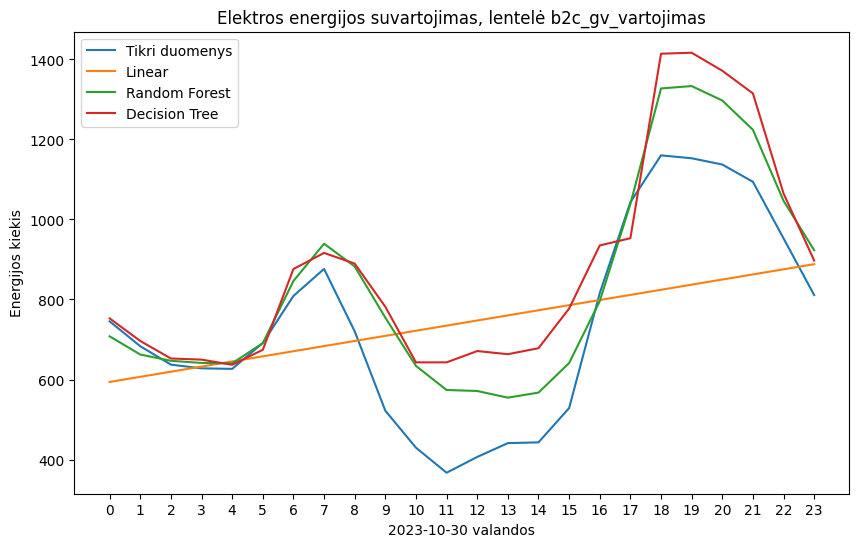

In [230]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df1_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df1_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df1_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2c_gv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df1_1031['valanda'], labels=df1_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [231]:
df2['viso'] = df2.iloc[:, 1:].sum(axis=1)
df2=df2[['data_valanda', 'viso']].copy()
df2['valanda']=df2['data_valanda'].dt.hour
df2['diena']=df2['data_valanda'].dt.day
df2['menuo']=df2['data_valanda'].dt.month
df2['sav_diena']=df2['data_valanda'].dt.weekday

In [232]:
df2_1031=df2[-49:-25].copy()

In [233]:
df2=df2[:-49]

In [234]:
df2_1031.head()

,data_valanda,viso,valanda,diena,menuo,sav_diena
8711,2023-10-30 00:00:00,6894.730016,0,30,10,0
8712,2023-10-30 01:00:00,6871.828988,1,30,10,0
8713,2023-10-30 02:00:00,6868.991428,2,30,10,0
8714,2023-10-30 03:00:00,6758.376506,3,30,10,0
8715,2023-10-30 04:00:00,7032.918868,4,30,10,0


In [235]:
X= df2.drop(columns=['data_valanda', 'viso'])
y=df2['viso']
x = df2_1031.drop(columns=['data_valanda', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(x)
df2_1031['Linear'] = pred

In [236]:
# rf = RandomForestRegressor(n_estimators=70, random_state=35)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(x)
df2_1031['RandomForest']=pred

Mean Absolute Percentage Error: 3.872377859451473%


In [237]:
# X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
# y = df_train['bendras_suvartojimas'].values      # target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# forest = RandomForestRegressor()
# forest.fit(X_train, y_train)
# y_pred = forest.predict(X_test)
# forest_score = forest.score(X_test, y_test) *100.0
# print(f'forest score: {forest_score}')

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

In [238]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(x)
df2_1031['DecisionTree']= pred

Mean Squared Error: 586316.4083366839
Mean Absolute Percentage Error: 4.585499341359969%


In [239]:
df2_1031.head(30)

,data_valanda,viso,valanda,diena,menuo,sav_diena,Linear,RandomForest,DecisionTree
8711,2023-10-30 00:00:00,6894.730016,0,30,10,0,10553.521398,7111.896766,7314.385445
8712,2023-10-30 01:00:00,6871.828988,1,30,10,0,10589.800897,7059.598379,7314.385445
8713,2023-10-30 02:00:00,6868.991428,2,30,10,0,10626.080396,7026.666699,7239.676896
8714,2023-10-30 03:00:00,6758.376506,3,30,10,0,10662.359896,7098.470300,7209.193161
8715,2023-10-30 04:00:00,7032.918868,4,30,10,0,10698.639395,7224.091751,7439.641432
8716,2023-10-30 05:00:00,7939.782129,5,30,10,0,10734.918895,7913.548047,7998.938276
8717,2023-10-30 06:00:00,10662.621605,6,30,10,0,10771.198394,10400.187107,10848.683232
8718,2023-10-30 07:00:00,13644.566871,7,30,10,0,10807.477893,15705.015010,16248.446100
8719,2023-10-30 08:00:00,15574.605416,8,30,10,0,10843.757393,19354.989148,19546.539242
8720,2023-10-30 09:00:00,14059.200347,9,30,10,0,10880.036892,19396.742149,19365.412279


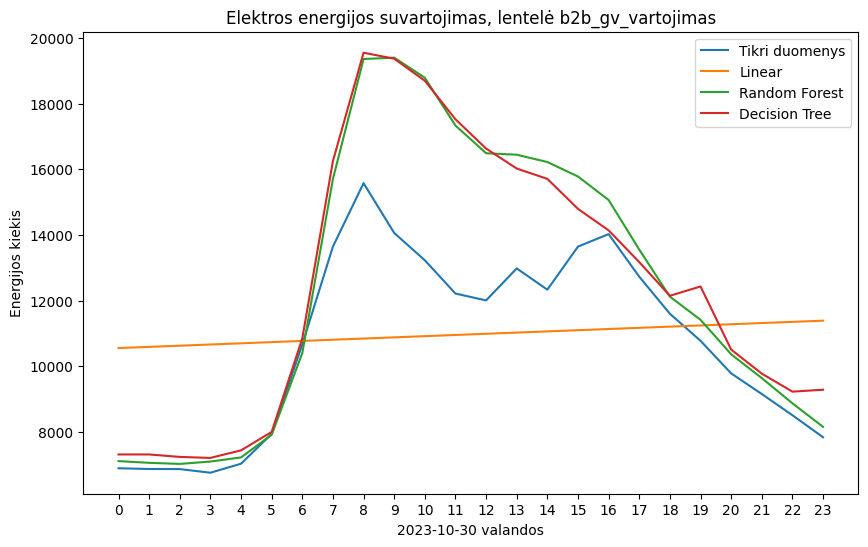

In [240]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df2_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df2_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df2_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df2_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2b_gv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df2_1031['valanda'], labels=df2_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [241]:
df3['viso'] = df3.iloc[:, 1:].sum(axis=1)
df3=df3[['data_valanda', 'viso']].copy()
df3['valanda']=df3['data_valanda'].dt.hour
df3['diena']=df3['data_valanda'].dt.day
df3['menuo']=df3['data_valanda'].dt.month
df3['sav_diena']=df3['data_valanda'].dt.weekday
df3_1031=df3[-49:-25].copy()
df3=df3[:-49]

In [242]:
df3_1031.head()

,data_valanda,viso,valanda,diena,menuo,sav_diena
8711,2023-10-30 00:00:00,428.724936,0,30,10,0
8712,2023-10-30 01:00:00,412.581332,1,30,10,0
8713,2023-10-30 02:00:00,402.581666,2,30,10,0
8714,2023-10-30 03:00:00,394.806999,3,30,10,0
8715,2023-10-30 04:00:00,437.968999,4,30,10,0


In [243]:
X= df3.drop(columns=['data_valanda', 'viso'])
y=df3['viso']
x = df3_1031.drop(columns=['data_valanda', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(x)
df3_1031['Linear'] = pred

In [261]:
jkl = df3[df3['valanda']==3]
jkl=jkl.sort_values(by='viso', ascending=True)

In [268]:
jkl.tail(3)

,data_valanda,viso,valanda,diena,menuo,sav_diena
1083,2022-12-16 03:00:00,576.277119,3,16,12,4
1131,2022-12-18 03:00:00,588.733046,3,18,12,6
8690,2023-10-29 03:00:00,863.683969,3,29,10,6


In [244]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(x)
df3_1031['RandomForest']=pred

Mean Absolute Percentage Error: 3.6629936214597154%


In [245]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(x)
df3_1031['DecisionTree']= pred

Mean Squared Error: 1683.6747895838807
Mean Absolute Percentage Error: 4.613277615041759%


In [246]:
df3_1031.head(30)

,data_valanda,viso,valanda,diena,menuo,sav_diena,Linear,RandomForest,DecisionTree
8711,2023-10-30 00:00:00,428.724936,0,30,10,0,594.388495,460.995351,488.445538
8712,2023-10-30 01:00:00,412.581332,1,30,10,0,601.945192,455.169752,472.934866
8713,2023-10-30 02:00:00,402.581666,2,30,10,0,609.501888,448.695327,462.763799
8714,2023-10-30 03:00:00,394.806999,3,30,10,0,617.058584,578.947983,863.683969
8715,2023-10-30 04:00:00,437.968999,4,30,10,0,624.615281,503.430556,453.380153
8716,2023-10-30 05:00:00,489.837000,5,30,10,0,632.171977,501.618090,499.562753
8717,2023-10-30 06:00:00,585.040665,6,30,10,0,639.728673,597.628974,622.444111
8718,2023-10-30 07:00:00,660.999999,7,30,10,0,647.285370,737.760370,714.320551
8719,2023-10-30 08:00:00,825.074667,8,30,10,0,654.842066,873.957309,840.605236
8720,2023-10-30 09:00:00,955.184667,9,30,10,0,662.398763,999.921165,1011.181371


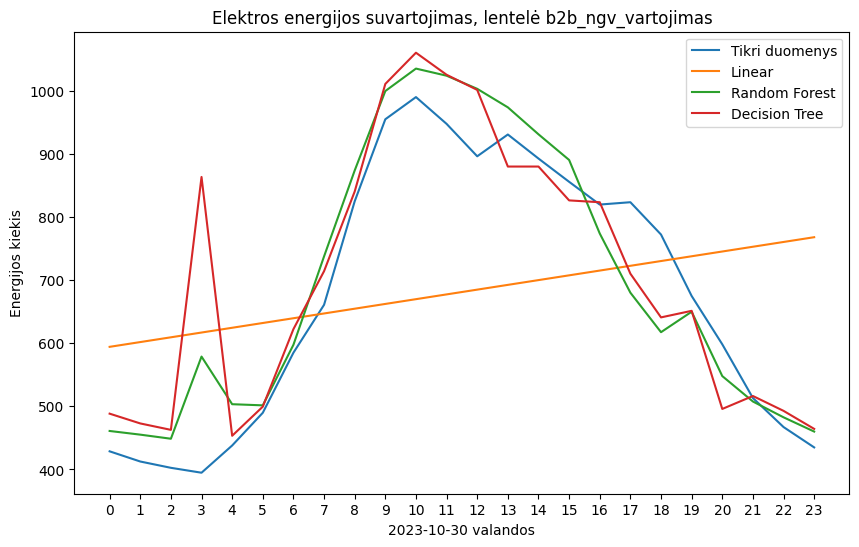

In [247]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df3_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df3_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df3_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df3_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2b_ngv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df3_1031['valanda'], labels=df3_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [248]:
df4['viso'] = df4.iloc[:, 1:].sum(axis=1)
df4=df4[['dateTime', 'viso']].copy()
df4['valanda']=df4['dateTime'].dt.hour
df4['diena']=df4['dateTime'].dt.day
df4['menuo']=df4['dateTime'].dt.month
df4['sav_diena']=df4['dateTime'].dt.weekday
df4_1031=df4[-25:-1].copy()
df4=df4[:-25]

In [249]:
X= df4.drop(columns=['dateTime', 'viso'])
y=df4['viso']
x = df4_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(x)
df4_1031['Linear'] = pred

In [250]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(x)
df4_1031['RandomForest']=pred

Mean Absolute Percentage Error: 3.3114642460823207%


In [251]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(x)
df4_1031['DecisionTree']= pred

Mean Squared Error: 125.19158624204236
Mean Absolute Percentage Error: 4.34804575543187%


In [252]:
df4_1031.head(30)

,dateTime,viso,valanda,diena,menuo,sav_diena,Linear,RandomForest,DecisionTree
2160,2023-10-30 00:00:00,173.130666,0,30,10,0,164.593722,208.422978,219.180333
2161,2023-10-30 01:00:00,149.582333,1,30,10,0,171.551782,192.322018,189.393002
2162,2023-10-30 02:00:00,145.826333,2,30,10,0,178.509842,193.293862,185.989334
2163,2023-10-30 03:00:00,134.547333,3,30,10,0,185.467903,262.602816,323.889001
2164,2023-10-30 04:00:00,138.692333,4,30,10,0,192.425963,192.247468,156.395666
2165,2023-10-30 05:00:00,166.767333,5,30,10,0,199.384023,180.606604,172.612334
2166,2023-10-30 06:00:00,211.151334,6,30,10,0,206.342084,231.763961,229.469332
2167,2023-10-30 07:00:00,236.360666,7,30,10,0,213.300144,261.038044,266.135667
2168,2023-10-30 08:00:00,258.001000,8,30,10,0,220.258204,266.833372,274.924667
2169,2023-10-30 09:00:00,267.141667,9,30,10,0,227.216265,270.712381,276.412000


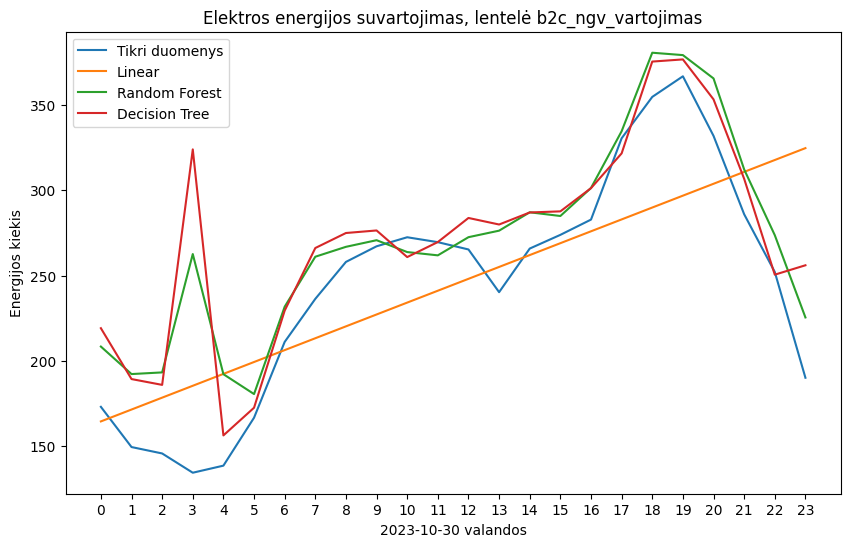

In [253]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df4_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df4_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df4_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df4_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2c_ngv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df4_1031['valanda'], labels=df4_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [254]:
df_bendra = pd.merge(df1_1031, df2_1031, on='valanda', suffixes=('1', '2'))
df_laikina = pd.merge(df3_1031, df4_1031, on='valanda', suffixes=('3', '4'))
df_bendra = pd.merge(df_bendra, df_laikina, on='valanda')

In [255]:
df_bendra['viso'] = df_bendra['viso1'] + df_bendra['viso2'] + df_bendra['viso3'] + df_bendra['viso4']
df_bendra['Linear'] = df_bendra['Linear1'] + df_bendra['Linear2'] + df_bendra['Linear3'] + df_bendra['Linear4']
df_bendra['RandomForest'] = df_bendra['RandomForest1'] + df_bendra['RandomForest2'] + df_bendra['RandomForest3'] + df_bendra['RandomForest4']
df_bendra['DecisionTree'] = df_bendra['DecisionTree1'] + df_bendra['DecisionTree2'] + df_bendra['DecisionTree3'] + df_bendra['DecisionTree4']

In [256]:
df_bendra = df_bendra[['valanda', 'viso', 'Linear', 'RandomForest', 'DecisionTree']]

In [257]:

df_bendra.head(30)

,valanda,viso,Linear,RandomForest,DecisionTree
0,0,8241.925953,11906.403780,8489.213095,8774.791883
1,1,8117.204154,11969.996379,8369.502568,8673.039846
2,2,8054.573259,12033.588979,8315.406222,8540.961729
3,3,7915.651305,12097.181578,8581.385069,9046.476297
4,4,8236.156300,12160.774177,8560.337206,8686.177118
5,5,9287.652895,12224.366776,9286.536586,9345.324696
6,6,12267.673072,12287.959376,12075.807055,12576.768374
7,7,15418.323802,12351.551975,17643.228487,18145.295151
8,8,17378.072149,12415.144574,21378.423853,21551.803679
9,9,15803.566348,12478.737173,21421.983315,21434.857450


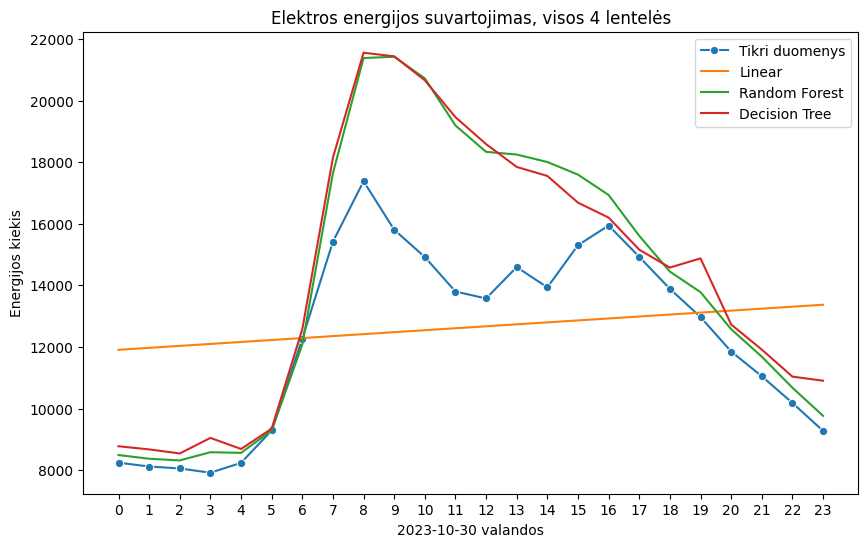

In [258]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_bendra, x='valanda', y='viso', label='Tikri duomenys', marker='o')
sns.lineplot(data=df_bendra, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df_bendra, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df_bendra, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, visos 4 lentelės')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df_bendra['valanda'], labels=df_bendra['valanda'])
# plt.xticks(rotation=0)
plt.show()